In [1]:
#importing labraries
import pandas as pd

In [2]:
df = pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# droping the index column "unnamed :0"
df = pd.read_csv("Advertising.csv", index_col=0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [4]:
#checking for missing valuse
#!pip install missingno


  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)


In [4]:
import missingno as msno
#matplotlib library for plotting 2D graphics
import matplotlib.pyplot as plt

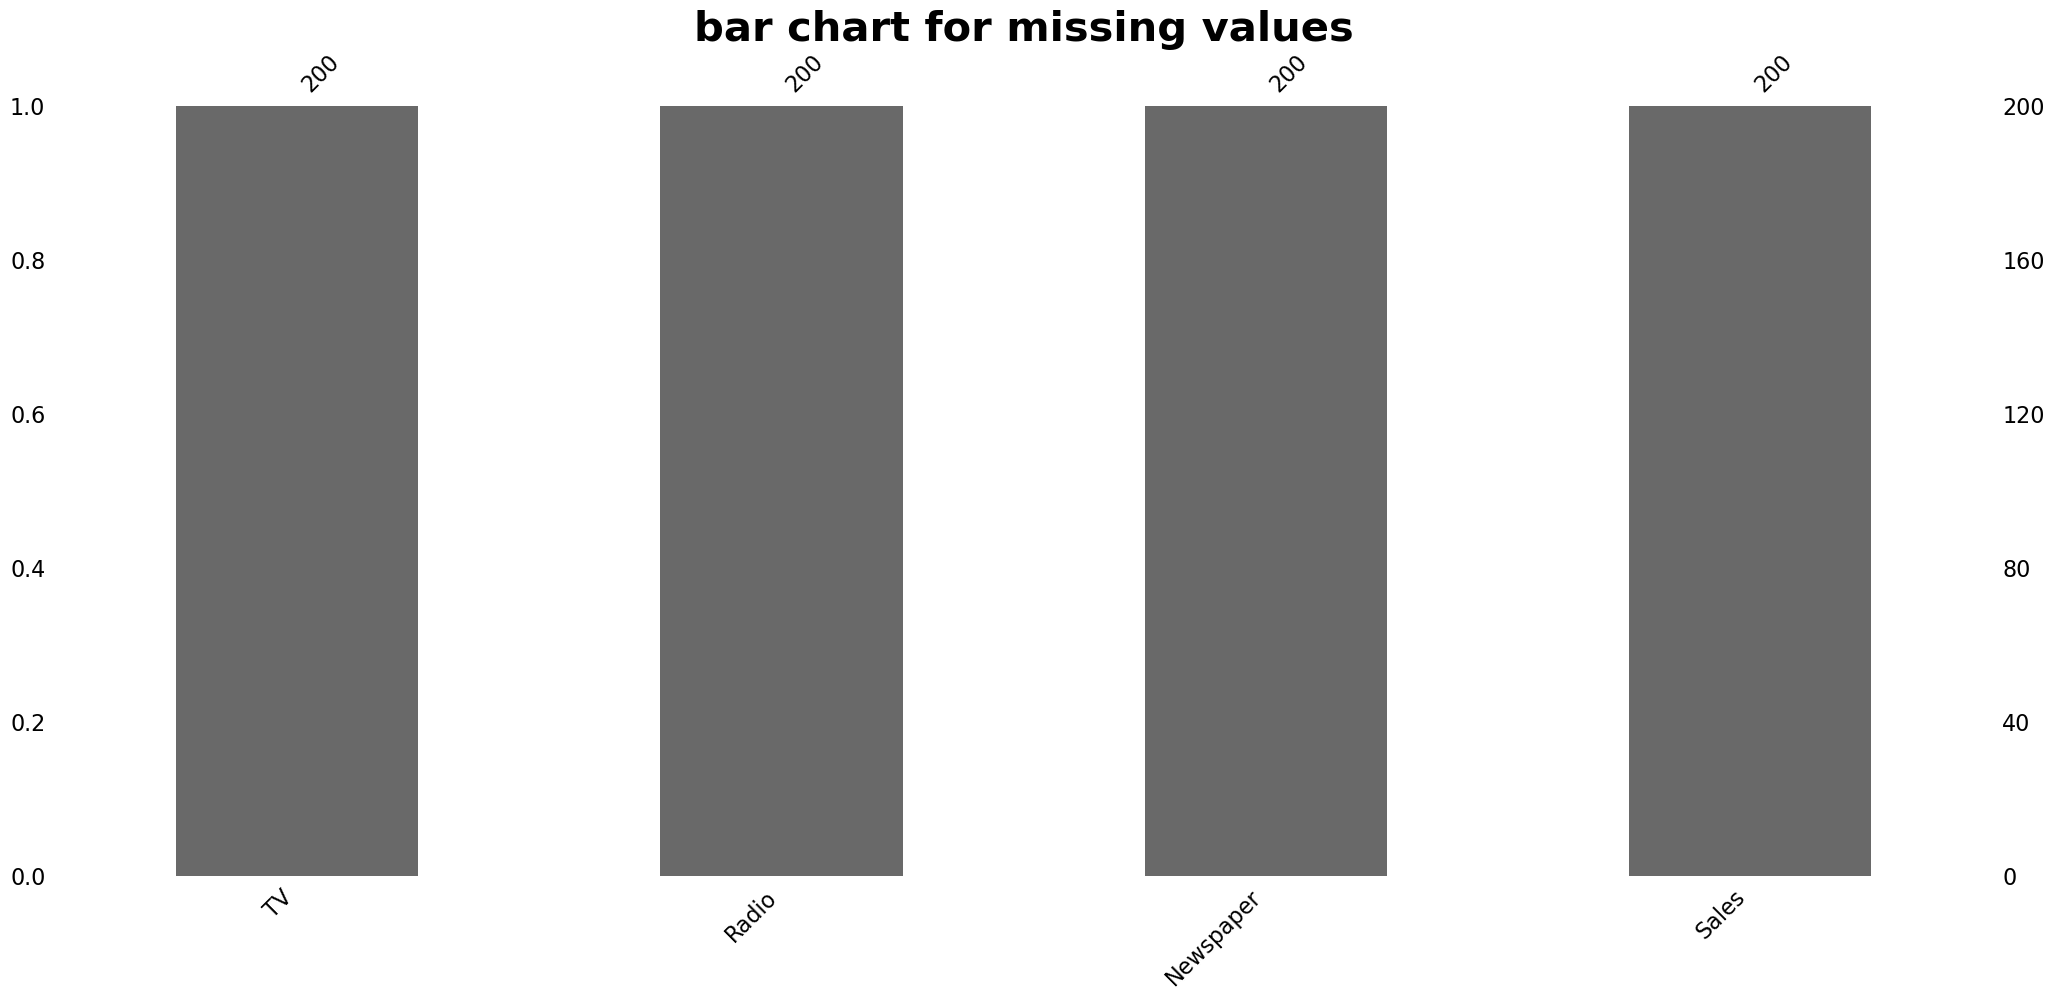

In [5]:
msno.bar(df)
plt.title('bar chart for missing values', fontsize=30, fontweight='bold')
plt.show()

In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# checking if there's relationship between sales and the TV

In [8]:
# taking the TV column and the sales column and assign the series to X and y
# using tv to predict the sales, sales as the response variable and Tv as the predictor 
#or feature

x = df['TV'].tolist()
y = df['Sales'].tolist()

In [9]:
# simple linear regression

from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x, y)
slope, intercept, r, p, std_err

(0.04753664043301975,
 7.032593549127695,
 0.7822244248616065,
 1.467389700194655e-42,
 0.0026906071877968703)

In [10]:


def regr(x):
    return intercept + slope * x
sales = regr(40)
print('the sales will be :', sales)

the sales will be : 8.934059166448485


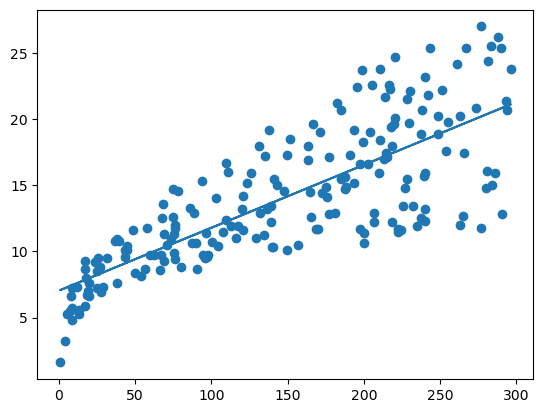

In [11]:
# the line of Linear Regression:
mymodel = list(map(regr, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

# Polynomial Regression

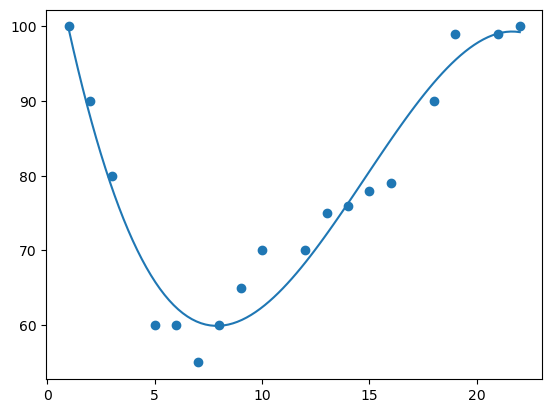

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x_1 = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y_1 = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]
mymodel = np.poly1d(np.polyfit(x_1, y_1, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x_1, y_1)
plt.plot(myline, mymodel(myline))
plt.show()


# R-Squared


In [ ]:
#It is important to know how well the relationship between the values of the x- and y-axis is, 
#if there are no relationship the polynomial regression can not be used to predict anything.

#The relationship is measured with a value called the r-squared.

#The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.

In [15]:
from sklearn.metrics import r2_score
print(r2_score(y, mymodel(x_1)))


0.9432150416451027


In [16]:
#make prediction
speed = mymodel(10)
speed

62.39730982562989

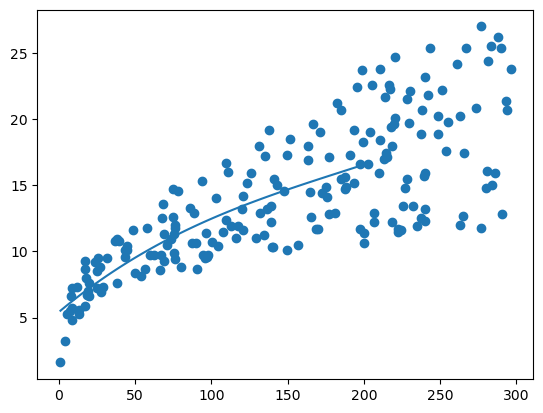

the R2_score is :  0.6220016830036417


In [22]:
#lets try and see if polynomial regreesion will be a good fit for the sales dataset
x = df['TV'].tolist()
y = df['Sales'].tolist()

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 200, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()
print("the R2_score is : ", r2_score(y, mymodel(x)))


# Introducing Scikit-Learn for linear regression

In [23]:
from sklearn.linear_model import LinearRegression

X = df[['TV']].values
y = df['Sales'].values

In [24]:
#Winstantiating the model by using linear regression and call it reg
reg = LinearRegression()

In [25]:
# using now that model to fit the data by passing the data X and y
reg.fit(X,y)

LinearRegression()

In [26]:
#having fitted the model i can use the same variable, reg, to take the attribute 
#coefficients to see the slope and intercept. The underscore is used to see the slope.

slop = reg.coef_
intercept = reg.intercept_

print('slope =', slop)
print('intercept = ', intercept)

slope = [0.04753664]
intercept =  7.0325935491276885


In [27]:
#i can use the method predict to predict at any given x(tv) what would be the value of y(sales)
import numpy as np
pred = reg.predict(np.array([[40]]))
pred

array([8.93405917])

# Multiple Regression

In [28]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [38]:
X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

In [39]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [40]:
#predict the sales given the investment of Tv, newpaper and radio
predictedsales = regr.predict([[50, 40, 20]])
predictedsales

array([12.74757246])

# Coefficient
The coefficient is a factor that describes the relationship with an unknown variable.

Example: if x is a variable, then 2x is x two times. x is the unknown variable, and the number 2 is the coefficient.In this case, we can ask for the coefficient value of TV against Sales, for Newspaper against Sales, and for Radio against Sales. The answer(s) we get tells us what would happen if we increase, or decrease, one of the independent values.

In [41]:
print(regr.coef_)

[ 0.04576465  0.18853002 -0.00103749]


# Result Explained
The result array represents the coefficient values of weight and volume.

Tv: 0.04576465 
Radio: 0.18853002
Newspaper : -0.00103749

These values tell us that if the tv increase by 1unit, the Sales increases by 0.04576465.

 if the Radio increases by 1 unit, the Sales  increases by 0.18853002.
 and  if the Newspaper increases by 1 unit, the Sales  decreases by 0.00103749



# Scale Features

When your data has different values, and even different measurement units, it can be difficult to compare them. What is kilograms compared to meters? Or altitude compared to time?

The answer to this problem is scaling. We can scale data into new values that are easier to compare.

There are different methods for scaling data, in this tutorial we will use a method called standardization.

The standardization method uses this formula:

z = (x - u) / s



In [44]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [47]:

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


X = df[['TV', 'Radio', 'Newspaper']].values

scaledX = scale.fit_transform(X)

print(scaledX)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

In [48]:
scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)
 # make prediction
scaled = scale.transform([[50, 40, 20]])

predictedsales = regr.predict([scaled[0]])
print(predictedsales)

[12.74757246]


# Machine Learning - Train/Test

# Evaluate Your Model

In Machine Learning we create models to predict the outcome of certain events, like in the previous chapter where we predicted the CO2 emission of a car when we knew the weight and engine size.

To measure if the model is good enough, we can use a method called Train/Test.

Train/Test is a method to measure the accuracy of your model.

It is called Train/Test because you split the data set into two sets: a training set and a testing set.

80% for training, and 20% for testing.

You train the model using the training set.

You test the model using the testing set.

Train the model means create the model.

Test the model means test the accuracy of the model.

# Machine Learning - Decision Tree

Decision Tree
In this chapter we will show you how to make a "Decision Tree". A Decision Tree is a Flow Chart, and can help you make decisions based on previous experience.

In the example, a person will try to decide if he/she should go to a comedy show or not.

Luckily our example person has registered every time there was a comedy show in town, and registered some information about the comedian, and also registered if he/she went or not.

In [84]:
show = pd.read_csv("Shows.csv")
show.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


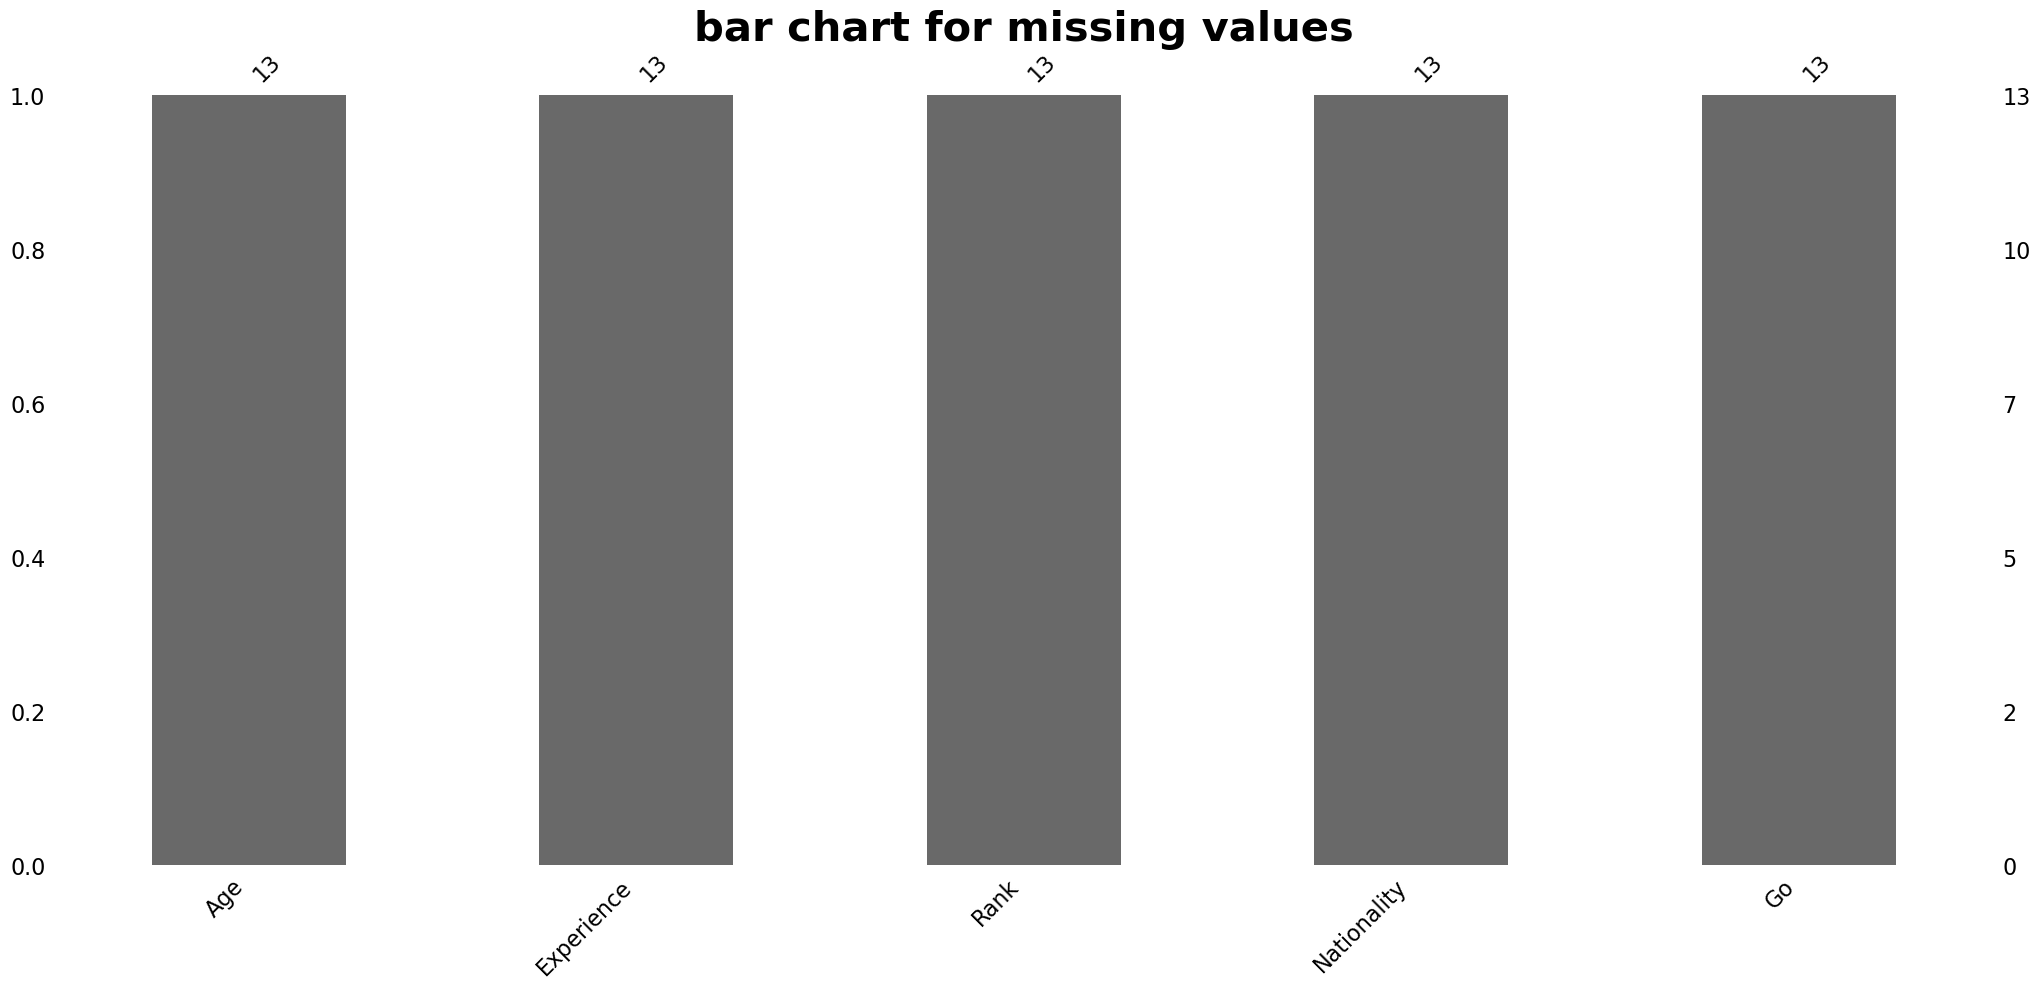

In [85]:
msno.bar(show)
plt.title('bar chart for missing values', fontsize=30, fontweight='bold')
plt.show()

In [86]:
show.isna().sum()

Age            0
Experience     0
Rank           0
Nationality    0
Go             0
dtype: int64

In [87]:
show["Nationality"].unique()

array(['UK', 'USA', 'N'], dtype=object)

In [88]:
show["Go"].unique()

array(['NO', 'YES'], dtype=object)

In [89]:
# Change string values into numerical values:

d = {'UK': 0, 'USA': 1, 'N': 2}
show['Nationality'] = show['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
show['Go'] = show['Go'].map(d)

show.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1


In [95]:
# X is the feature columns, y is the target column:

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = show[features].values
y = show['Go'].values

#X.head()




[Text(0.4, 0.875, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6, 0.625, 'Age <= 39.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.4, 0.375, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

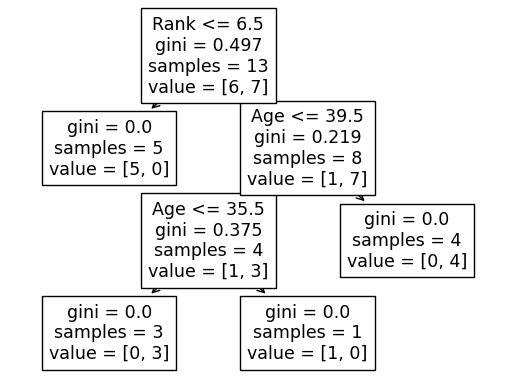

In [96]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt





dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

In [101]:
print(dtree.predict([[40, 10, 7, 1]]))

[1]


In [100]:
print(dtree.predict([[39, 10, 7, 1]]))

[0]
